In [1]:
#Data manipulation and visualisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_columns', None)

# import file 

In [59]:
df = pd.read_excel("Data_scientist_Assessment.xls","Data",header=1)

In [60]:
#22.1% defaulter. Data might be overweighted

df["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

# Clean data 

In [61]:
#no missing value
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [62]:
# rename pay_0 
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# feature engineering 

In [63]:
# get balance bill after payment
for i in range(1,7):
    df["balance"+str(i)] = df["BILL_AMT"+str(i)] - df["PAY_AMT"+str(i)]

In [65]:
# get maximum backlog months of payment
backlog_payment = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df["max_backlog_month"] = backlog_payment.max(axis="columns")

In [66]:
#get max balance of payment
backlog_balance = df[['balance1', 'balance2', 'balance3','balance4', 'balance5', 'balance6']]
df["max_backlog_balance"] = backlog_balance.max(axis="columns")

In [67]:
#get balance to credit ratio. signal ability to clear the balance
df["balance_to_credit"] = df["max_backlog_balance"] / df["LIMIT_BAL"]

In [69]:
df = df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'max_backlog_month',
       'balance_to_credit', 'default payment next month']]

# covert categories to nominal level

In [77]:
#gender
def get_gender(value):
    if value == 1: 
        return "male"
    else:
        return "female" 
    
df["SEX"] = df["SEX"].apply(get_gender)

In [80]:
#martial status
def get_status(value):
    if value == 1: 
        return "married"
    elif value == 2:
        return "single" 
    else:
        return "others" 
    
df["MARRIAGE"] = df["MARRIAGE"].apply(get_status)

In [81]:
df

,SEX,EDUCATION,MARRIAGE,AGE,max_backlog_month,balance_to_credit,default payment next month
0,female,2,married,24,2,0.195650,1
1,female,2,single,26,2,0.028792,1
2,female,2,single,34,0,0.308011,0
3,female,2,married,37,0,0.961820,0
4,male,2,married,57,0,0.516700,0
...,...,...,...,...,...,...,...
29995,male,3,married,39,0,0.924373,0
29996,male,3,single,43,0,0.059000,0
29997,male,2,single,37,4,0.619400,1
29998,male,3,married,41,1,0.939075,1


# feature selection

In [86]:
#numericals variables
df_numerics = df[['EDUCATION', 'AGE', 'max_backlog_month',
       'balance_to_credit']]

#strongest coorelations at age and dependence of only 29%. All numerical features shall be retained
corr = df_numerics.corr()
corr.style.background_gradient(cmap='coolwarm')

,EDUCATION,AGE,max_backlog_month,balance_to_credit
EDUCATION,1.000000,0.175061,0.085161,0.183314
AGE,0.175061,1.000000,-0.049913,-0.041573
max_backlog_month,0.085161,-0.049913,1.000000,0.298926
balance_to_credit,0.183314,-0.041573,0.298926,1.000000


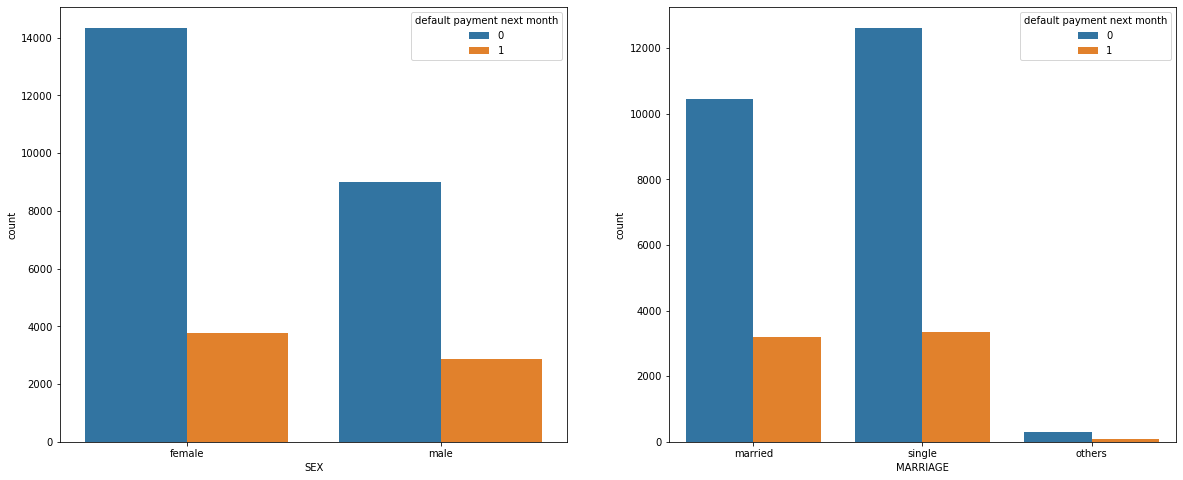

In [109]:
#categorical variables
catorgical_variables = ["SEX", "MARRIAGE"]

#no level dominates the default rate. all are used
fig, axes = plt.subplots(1, 2,figsize=(20,8))
for i in range(0, len(catorgical_variables)):
    sns.countplot(x=catorgical_variables[i], hue="default payment next month", data=df, ax=axes[i,])

In [110]:
df.to_csv("cleaned_data.csv",index=False)

In [111]:
df

,SEX,EDUCATION,MARRIAGE,AGE,max_backlog_month,balance_to_credit,default payment next month
0,female,2,married,24,2,0.195650,1
1,female,2,single,26,2,0.028792,1
2,female,2,single,34,0,0.308011,0
3,female,2,married,37,0,0.961820,0
4,male,2,married,57,0,0.516700,0
...,...,...,...,...,...,...,...
29995,male,3,married,39,0,0.924373,0
29996,male,3,single,43,0,0.059000,0
29997,male,2,single,37,4,0.619400,1
29998,male,3,married,41,1,0.939075,1
